# Compare the PNAS configuration runs

Some open questions:
- Why does 006 not crash but all the others do?
- Why is the loss for 32 col (0.0018) and 8 col (0.0056) so different
- How would the 32 col version perform on the 8 col validation file, and vice versa?

In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
from cbrain.imports import *
limit_mem()
from cbrain.utils import *
from cbrain.normalization import conversion_dict
from cbrain.data_generator import DataGenerator
from cbrain.model_diagnostics import *
from cbrain.cam_constants import *

In [7]:
mds = {}

In [10]:
exps = ['001_8col_pnas', '005_32col_pnas', '006_8col_pnas_exact', '007_32col_pnas_exact']

In [8]:
mds['001_8col_pnas'] = ModelDiagnostics(
    '../../nn_config/001_8col_pnas.yml', 
    '/local/S.Rasp/preprocessed_data/001_valid.nc'
)
mds['005_32col_pnas'] = ModelDiagnostics(
    '../../nn_config/005_32col_pnas.yml', 
    '/local/S.Rasp/preprocessed_data/003_valid.nc'
)
mds['006_8col_pnas_exact'] = ModelDiagnostics(
    '../../nn_config/006_8col_pnas_exact.yml', 
    '/local/S.Rasp/preprocessed_data/001_valid.nc'
)
mds['007_32col_pnas_exact'] = ModelDiagnostics(
    '../../nn_config/007_32col_pnas_exact.yml', 
    '/local/S.Rasp/preprocessed_data/003_valid.nc'
)

In [9]:
for md in mds.values():
    md.compute_stats(250)

/filer/z-sv-pool12c/s/S.Rasp/repositories/CBRAIN-CAM/notebooks/stephans-devlog/cbrain/model_diagnostics.py:130: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/filer/z-sv-pool12c/s/S.Rasp/repositories/CBRAIN-CAM/notebooks/stephans-devlog/cbrain/model_diagnostics.py:130: RuntimeWarning: invalid value encountered in true_divide
  self.stats['r2'] = 1. - (self.stats['mse'] / self.stats['true_var'])
/filer/z-sv-pool12c/s/S.Rasp/repositories/CBRAIN-CAM/notebooks/stephans-devlog/cbrain/model_diagnostics.py:136: RuntimeWarning: invalid value encountered in true_divide
  self.stats['hor_r2'] = 1 - (self.stats['hor_mse'] / self.stats['hor_tvar'])


/filer/z-sv-pool12c/s/S.Rasp/repositories/CBRAIN-CAM/notebooks/stephans-devlog/cbrain/model_diagnostics.py:136: RuntimeWarning: divide by zero encountered in true_divide
  self.stats['hor_r2'] = 1 - (self.stats['hor_mse'] / self.stats['hor_tvar'])


## R2 by height

In [12]:
mds[exps[0]].valid_gen.output_vars

['PHQ', 'TPHYSTND', 'FSNT', 'FSNS', 'FLNT', 'FLNS', 'PRECT']

In [13]:
vars = ['PHQ', 'TPHYSTND']

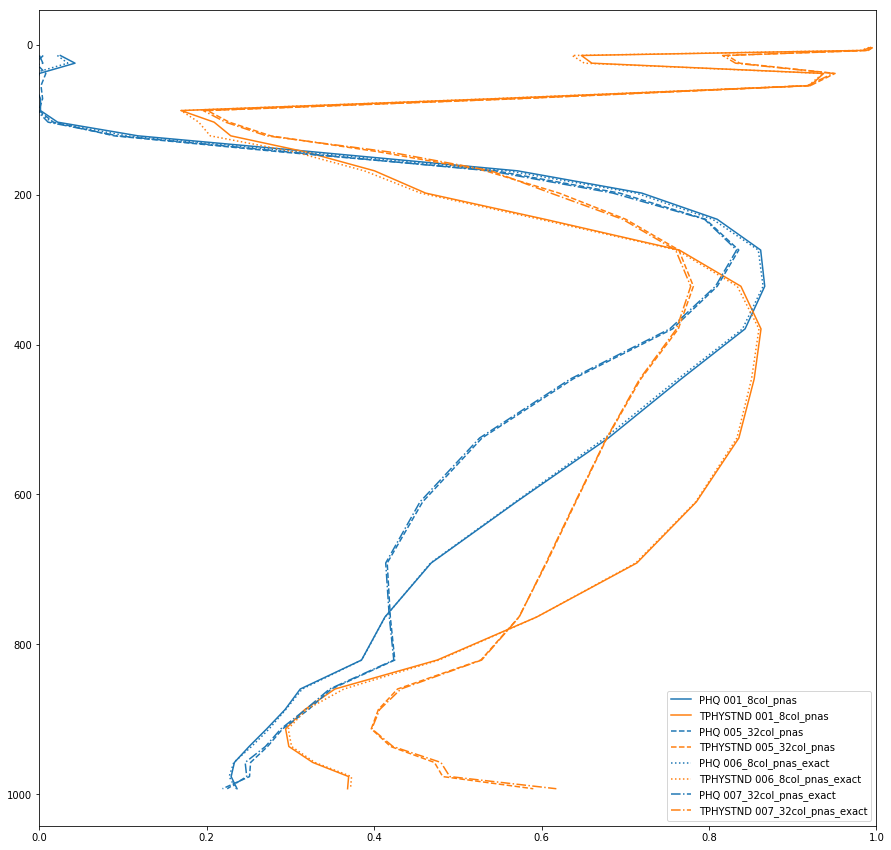

In [15]:
cols = sns.color_palette(n_colors=7)
fig, ax = plt.subplots(figsize=(15, 15))
for i, (exp, sty) in enumerate(zip(exps, ['-','--', ':', '-.'])):
    md = mds[exp]
    for v, c in zip(vars, cols):
        if v in md.valid_gen.output_vars:
            ax.plot(md.stats['hor_r2'][md.get_output_var_idx(v)], P, label=v+' '+exp, ls=sty, c=c)
ax.set_xlim(0, 1)
ax.invert_yaxis()
plt.legend()

## Loss 

In [16]:
exps

['001_8col_pnas',
 '005_32col_pnas',
 '006_8col_pnas_exact',
 '007_32col_pnas_exact']

In [17]:
mds['006_8col_pnas_exact'].mean_stats()

,bias,mse,pred_mean,true_mean,pred_sqmean,true_sqmean,pred_var,true_var,r2,hor_tsqmean,hor_tmean,hor_mse,hor_tvar,hor_r2
PHQ,-6.85251e-11,1.1808e-15,5.73295e-10,6.4182e-10,5.27663e-16,1.69917e-15,4.62321e-16,1.63538e-15,NaN,1.69917e-15,6.4182e-10,1.1808e-15,1.69303e-15,NaN
TPHYSTND,3.65574e-08,9.60357e-10,-3.30429e-07,-3.66986e-07,1.28155e-09,2.23243e-09,1.0159e-09,1.95776e-09,0.306256,2.23243e-09,-3.66986e-07,9.60357e-10,2.20762e-09,0.567695
FSNT,-0.717979,732.805,230.157,230.875,157881,159535,82764.4,83991.5,-inf,159535,230.875,732.805,106231,0.993102
FSNS,-0.702209,902.882,163.049,163.751,87945.5,89582.9,48694.1,49991.9,-inf,89582.9,163.751,902.882,62768.5,0.985616
FLNT,-0.401296,135.061,223.811,224.213,51863,52192.5,843.306,968.417,0.722264,52192.5,224.213,135.061,1921.18,0.929699
FLNS,-0.269832,85.5649,52.6301,52.8999,3402.46,3521.54,391.2,469.832,0.732201,3521.54,52.8999,85.5649,723.142,0.881676
PRECT,3.55522e-10,1.41409e-15,2.96895e-08,2.9334e-08,1.06486e-14,1.20157e-14,7.13241e-15,8.50926e-15,-inf,1.20157e-14,2.9334e-08,1.41409e-15,1.11552e-14,0.873235
all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.871837


In [18]:
mds['007_32col_pnas_exact'].mean_stats()

,bias,mse,pred_mean,true_mean,pred_sqmean,true_sqmean,pred_var,true_var,r2,hor_tsqmean,hor_tmean,hor_mse,hor_tvar,hor_r2
PHQ,5.3061e-11,3.93143e-16,6.147e-10,5.61639e-10,1.94917e-16,5.87539e-16,1.48424e-16,5.3884e-16,NaN,5.87539e-16,5.61639e-10,3.93143e-16,5.83298e-16,-inf
TPHYSTND,-1.17147e-07,4.82937e-10,-5.19159e-07,-4.02012e-07,7.82883e-10,1.27349e-09,5.97023e-10,1.06856e-09,0.470062,1.27349e-09,-4.02012e-07,4.82937e-10,1.25291e-09,0.610304
FSNT,0.257943,357.559,227.154,226.896,155395,155260,83160.9,83200.3,-inf,155260,226.896,357.559,103778,0.996555
FSNS,0.294348,441.223,159.586,159.291,85273.4,85304.4,48335.9,48512,-inf,85304.4,159.291,441.223,59930.6,0.992638
FLNT,-0.264256,86.1455,225.41,225.675,52410.6,52592.4,678.142,749.145,0.76614,52592.4,225.675,86.1455,1663.33,0.948209
FLNS,-0.101939,39.9579,49.4174,49.5193,3136.85,3189.3,400.521,435.199,0.830829,3189.3,49.5193,39.9579,737.136,0.945793
PRECT,-4.16636e-10,1.67805e-15,2.85394e-08,2.8956e-08,5.91466e-15,7.68023e-15,3.52021e-15,5.11133e-15,0.425032,7.68023e-15,2.8956e-08,1.67805e-15,6.84178e-15,0.754735
all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-inf


## Jacobians

In [29]:
X_mean_8col = get_mean_sounding(mds['006_8col_pnas_exact'])
X_mean_32col = get_mean_sounding(mds['007_32col_pnas_exact'])

In [21]:
X_mean_8col.shape

(94,)

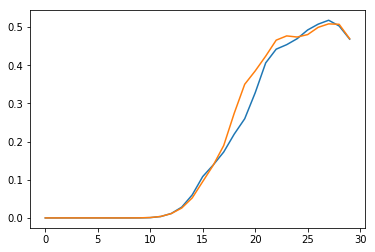

In [24]:
plt.plot(X_mean_8col[:30])
plt.plot(X_mean_32col[:30])

In [30]:
J006 = get_jacobian(X_mean_8col, mds['006_8col_pnas_exact'].model)
J007 = get_jacobian(X_mean_32col, mds['007_32col_pnas_exact'].model)

/home/s/S.Rasp/miniconda3/envs/tf/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/s/S.Rasp/miniconda3/envs/tf/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [48]:
J006 = J006 / mds['006_8col_pnas_exact'].valid_gen.input_transform.div
J007 = J007 / mds['007_32col_pnas_exact'].valid_gen.input_transform.div

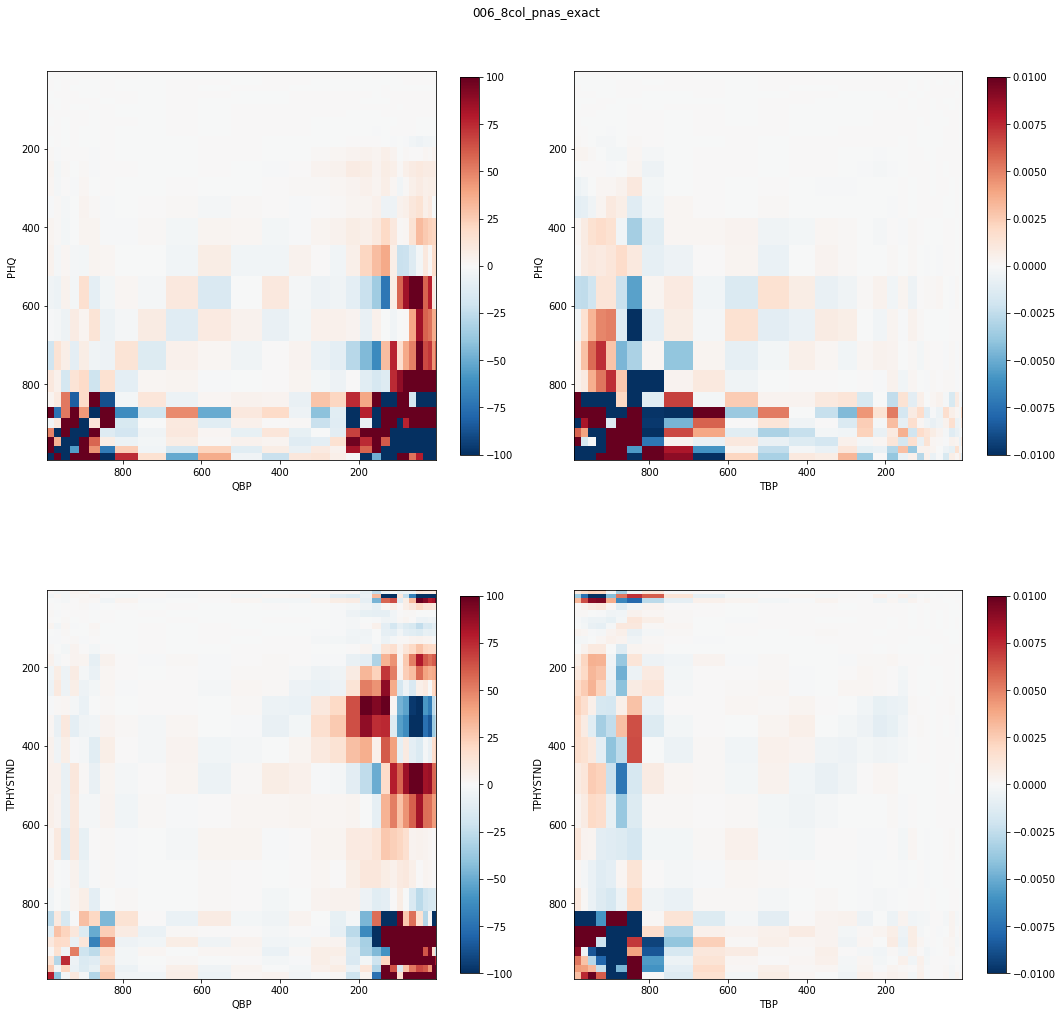

In [50]:
J = J006; md = mds['006_8col_pnas_exact']
fig, axs = plt.subplots(2, 2, figsize=(15,15))
plot_jacobian(J, md.valid_gen, inp_var='QBP', out_var='PHQ', cmap='RdBu_r', vmin=-100, vmax=100, ax=axs[0,0])
plot_jacobian(J, md.valid_gen, inp_var='TBP', out_var='PHQ', cmap='RdBu_r', vmin=-1e-2, vmax=1e-2, ax=axs[0,1])
plot_jacobian(J, md.valid_gen, inp_var='QBP', out_var='TPHYSTND', cmap='RdBu_r', vmin=-100, vmax=100, ax=axs[1,0])
plot_jacobian(J, md.valid_gen, inp_var='TBP', out_var='TPHYSTND', cmap='RdBu_r', vmin=-1e-2, vmax=1e-2, ax=axs[1,1])
plt.suptitle('006_8col_pnas_exact')
plt.tight_layout()

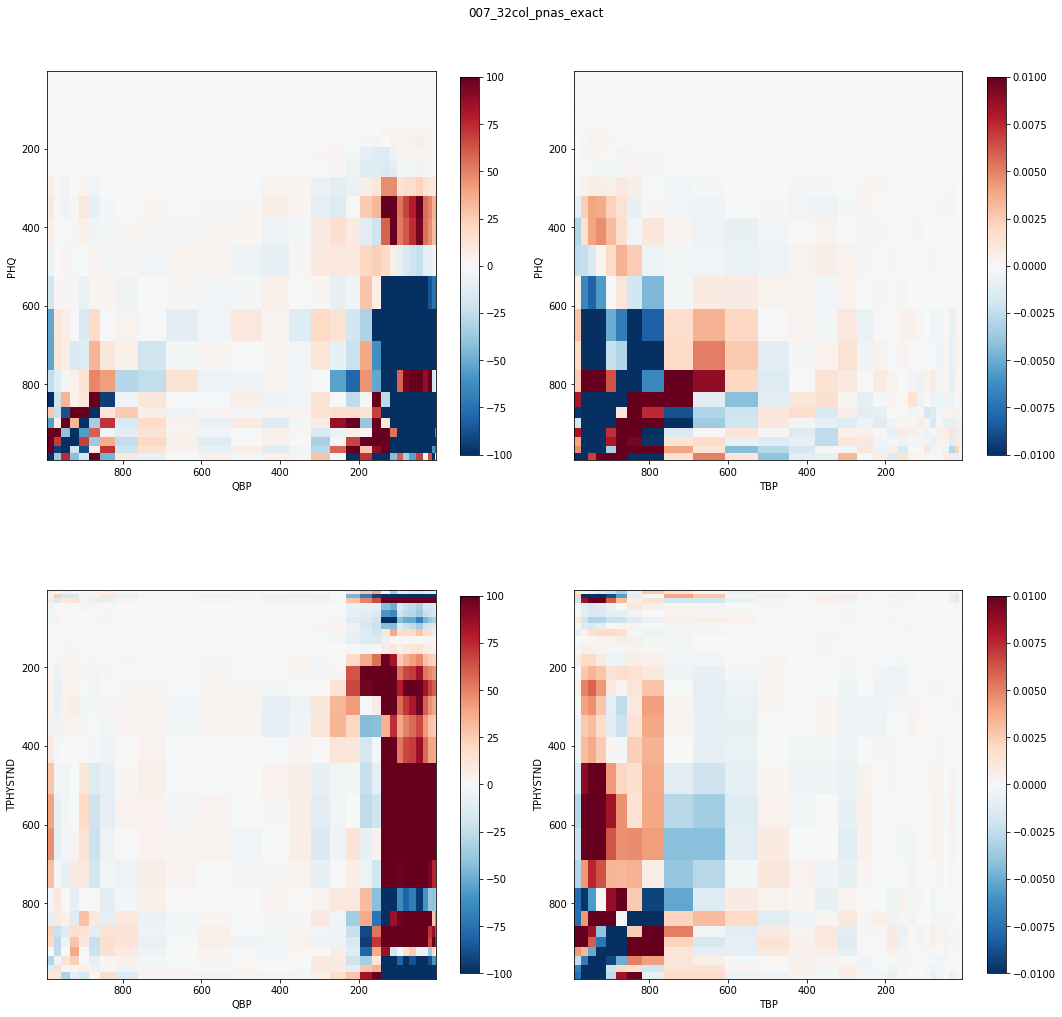

In [51]:
J = J007; md = mds['007_32col_pnas_exact']
fig, axs = plt.subplots(2, 2, figsize=(15,15))
plot_jacobian(J, md.valid_gen, inp_var='QBP', out_var='PHQ', cmap='RdBu_r', vmin=-100, vmax=100, ax=axs[0,0])
plot_jacobian(J, md.valid_gen, inp_var='TBP', out_var='PHQ', cmap='RdBu_r', vmin=-1e-2, vmax=1e-2, ax=axs[0,1])
plot_jacobian(J, md.valid_gen, inp_var='QBP', out_var='TPHYSTND', cmap='RdBu_r', vmin=-100, vmax=100, ax=axs[1,0])
plot_jacobian(J, md.valid_gen, inp_var='TBP', out_var='TPHYSTND', cmap='RdBu_r', vmin=-1e-2, vmax=1e-2, ax=axs[1,1])
plt.suptitle('007_32col_pnas_exact')
plt.tight_layout()